[3장 신경망]
신경망은 각 층의 뉴런들이 다음 층의 뉴런으로 신호를 전달한다는 점에서 앞 장의 퍼셉트론과 같습니다. 하지만 다음 뉴런으로 갈 때 신호를 변화시키는 활성화 함수에 차이가 있었습니다. (시그모이드 함수, ReLU 함수)

행렬 연산이 신경망 구현을 편리하게 만드는 것을 확인하고, 단일 표본에 대해, 한 단계 더 나아가 batch size의 표본에 대해 신경망을 구현해 보았습니다. 출력층의 활성화 함수로 회귀에서는 항등 함수(identity function), 분류에서는 소프트맥스 함수(softmax function)를 주로 이용합니다.

실습으로 MNIST 데이터셋을 이용한 손글씨 숫자를 인식해 보았습니다.

[정리]
신경망에서는 활성화 함수로 시그모이드 함수와 ReLU 함수 같은 매끄럽게 변화하는 함수를 이용한다.
넘파이의 다차원 배열을 잘 사용하면 신경망을 효율적으로 구현할 수 있다.
기계학습 문제는 크게 회귀와 분류로 나눌 수 있다.
출력층의 활성화 함수로는 회귀에서는 주로 항등 함수를, 분류에서는 주로 소프트맥스 함수를 이용한다.
분류에서는 출력층의 뉴런 수를 분류하려는 클래스 수와 같게 설정한다.
입력 데이터를 묶은 것을 배치라 하며, 추론 처리를 이 배치 단위로 진행하면 결과를 훨씬 빠르게 얻을 수 있다.

# 3. 신경망
## 3.1 퍼셉트론에서 신경망으로
### 3.1.1 신경망의 예
### 3.1. 2 퍼셉트론 복습
### 3.1.3 활성화 함수의 등장
 $a= b+w1x1+ w2x2$

 $y=h(a)$




## 3.2 활성화 함수
단순 퍼셉트론 - 계단함수 , 다층 퍼셉트론 - 신경망 - 시그모이드 함수

### 3.2.1 시그모이드 함수
 $h(x) =\frac{1}{1 + exp(-x)}$

퍼셉트론 vs 신경망 : *활성화 함수 * 차이


### 3.2.2 계단 함수 구현하기


In [1]:
import numpy as np
import matplotlib.pylab as plt

In [2]:
#계단함수 구현하기
#넘파이 배열을 인수로 넣을 수 없음
def step_function(x):
    if x>0:
        return 1
    else:
        return 0

In [3]:
#넘파이 배열을 인수로 넣을 수 있는 계단함수 구현
def step_function(x):
    y=x>0
    return y.astype(np.int)

In [4]:
import numpy as np
x=np.array([-1,1,2])
y=x>0
y #bool 배열

array([False,  True,  True])

In [ ]:
y=y.astype(np.int) #bool 배열을 int형으로
y

array([0, 1, 1])

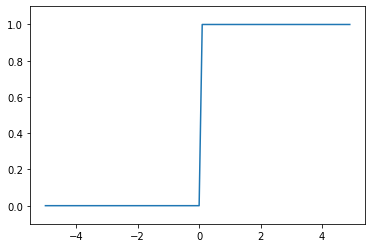

In [ ]:
# 최종
def step_function(x):
    return np.array(x > 0, dtype=np.int)

#그래프
X = np.arange(-5.0, 5.0, 0.1)
Y = step_function(X)
plt.plot(X, Y)
plt.ylim(-0.1, 1.1)  # y축의 범위 지정
plt.show()

### 3.2.4 시그모이드 함수 구현하기


In [10]:
import numpy as np
import matplotlib.pylab as plt

In [11]:
#시그모이드 함수 구현
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [12]:
#확인
x=np.array([-1,1,2])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

In [13]:
#넘파이의 브로드캐스트: 넘파이 배열과 스칼라 값의 연산을 넘파이 배열의 원소 각가과 스칼라 값의 연산으로 바꿔 수행하는 것
# 1/(1+np.exp(-x)) 에서 np.exp(-x)  가 넘파이 배열
t= np.array([1.0, 2.0, 3.0])
print(1.0+ t)
print(1.0/ t)

[2. 3. 4.]
[1.         0.5        0.33333333]


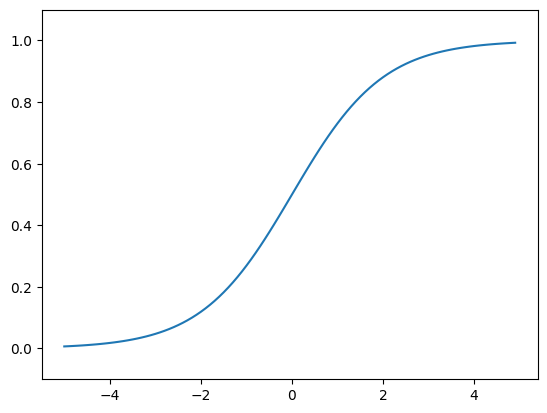

In [14]:
#그래프
X = np.arange(-5.0, 5.0, 0.1)
Y = sigmoid(X)
plt.plot(X, Y)
plt.ylim(-0.1, 1.1)
plt.show()

### 3.2.5 시그모이드 함수와 계단 함수 비교
- 차이점 : 매끄러움의 차이
  - 시그모이드 함수 - 신경망 학습에 중요 ** 연속적 실수

- 공통점
1.  입력이 중요하면 큰 값을 출력하고 입력이 중요하지 않으면 작은 값 출력
2. 입력이 아무리 작거나 커도 출력은 0에서 1 사이
3. 비선형 함수






### 3.2.6 비선형 함수
층을 쌓는 혜택 얻고자 ~ 활성화 함수로는 반드시 비선형 함수를 사용해야 함

### 3.2.7 Relu 함수
$h(x) = \begin{cases}
x & \ (x > 0) \\
0 & \ (x \leq 0)
\end{cases}$

In [ ]:
import numpy as np
import matplotlib.pylab as plt

In [ ]:
# ReLu 함수 구현
def relu(x):
    return np.maximum(0, x)

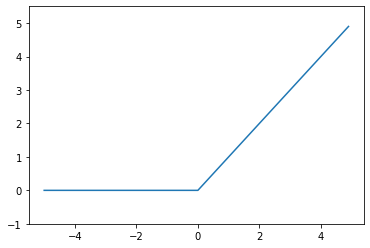

In [ ]:
x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-1.0, 5.5)
plt.show()

##3.3 다차원 배열의 계산
### 3.3.1 다차원 배열
### 3.3.2 헹렬의 곱
대응하는 차원의 원소 수를 일치시켜라
### 3.3.3 신경망에서의 행렬 곱


## 3.4 3층 신경망 구현하기
### 3.4.1 표기법 설명
$w12 (1) $
- (1): 1층의 가중치
- 1 : 다음 층의 1번째 뉴련
- 2: 앞 층의 2번 째 뉴련

###3.4.2 각 층 신호 전달 구현하기
편향은 오른 쪽 아래 인덱스가 하나밖에 없음 $b1(1)$



## 3.4.3 구현 정리


In [15]:
import numpy as np

In [16]:
#시그모이드, 항등 함수 구현
def sigmoid(x):
    return 1/(1+np.exp(-x))

def identity_function(x):
    return x

In [17]:
#3층 신경망 구현
def init_network(): #가중치와 편향을 초기화하고 이들을 딕셔너리 변수인 network에 저장
    network={}
    network['W1']=np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
    network['b1']=np.array([0.1,0.2,0.3])
    network['W2']=np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
    network['b2']=np.array([0.1,0.2])
    network['W3']=np.array([[0.1,0.3],[0.2,0.4]])
    network['b3']=np.array([0.1,0.2])

    return network

def forward(network, x): #순방향으로 전달됨
    W1, W2, W3=network['W1'], network['W2'],network['W3']
    b1, b2, b3= network['b1'], network['b2'], network['b3']

    a1=np.dot(x, W1)+b1
    z1=sigmoid(a1)
    a2=np.dot(z1, W2)+b2
    z2=sigmoid(a2)
    a3=np.dot(z2, W3)+b3
    y=identity_function(a3) #identity_function 항등 함수 , 출력층의 활성화 함수

    return y

In [ ]:
network=init_network()
x=np.array([1,0.5])
y=forward(network, x)
print(y) #[0.31682708 0.69627909]

[0.31682708 0.69627909]


## 3.5 출력층 설계하기
- 출력층에서 회귀 - 항등 함수, 분류- 소프트맥스 함수 사용

### 3.5.1 항등 함수와 소프트맥스 함수 구현하기
- 항등함수: 입력을 그대로 출력
- 소프트맥스 함수
$ y_K = \frac{\text{exp}(a_K)}{\sum_{i=1}^{n} \text{exp}(a_i)} $


### 3.5.2 소프트맥스 함수 구현 시 주의점
오버플로 문제

In [18]:
def softmax(a):
  C=np.max(a)
  exp_a =np.exp(a-c)
  sum_exp_a =np.sum (exp_a)
  y = exp_a / sum_exp_a

  return y

### 3.5.3 소프트맥스 함수의 특징
1. 출력이 0에서 1 사이이의 실수 , 출력 총합이 1
2. 소프트맥스 함수 적용해도 각 원소의 대소 관계는 안 변해

### 3.5.4 출력층의 뉴런 수 정하기
분류에서는 분류하고 싶은 클래스 수로 설정하는 것이 일반적



## 3.6 손글씨 숫자 인식

### 3.6.1 mnist 데이터셋



In [19]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
import pickle
from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax

ModuleNotFoundError: No module named 'dataset'

In [20]:
# 입력층 뉴런 : 784개, 출력층 뉴런 : 10개
# 은닉층은 총 두개, 첫 번째 은닉층 : 50개의 뉴런, 두 번째 은닉층 : 100개의 뉴런

In [ ]:
def get_data():  #normalize, flatten, one_hot_label
    (x_train, t_train), (x_test, t_test)= load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

def init_network():
    with open("sample_weight.pkl","rb") as f: #학습된 가중치 매개변수
        network=pickle.load(f)
    return network


def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3) #소프트맥스 사용

    return y

In [ ]:
x, t=get_data()
network=init_network()

accuracy_cnt=0
for i in range(len(x)):
    y=predict(network, x[i])
    p=np.argmax(y) #확률이 가장 높은 원소의 인덱스를 반환
    if p==t[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


In [ ]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image


def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

img = x_train[0]
label = t_train[0]
print(label)  # 5

print(img.shape)  # (784,) #flatten 위에서 했으니까
img = img.reshape(28, 28)  # 형상을 원래 이미지의 크기로 변형
print(img.shape)  # (28, 28)

img_show(img)


Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!
5
(784,)
(28, 28)


## 3.6.3 배치 처리
배치: 하나로 묶은 입력 데이터


In [ ]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록
import numpy as np
import pickle
from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax

In [ ]:
def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test


def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network


def predict(network, x):
    w1, w2, w3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, w1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, w2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, w3) + b3
    y = softmax(a3)

    return y

In [ ]:
#batch로 mnist 구현
x, t=get_data()
network=init_network()

batch_size=100 #배치크기
accuracy_cnt=0

for i in range(0, len(x), batch_size):
    x_batch=x[i:i+batch_size]
    y_batch=predict(network, x_batch)
    p=np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p==t[i:i+batch_size])

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

#[정리]
- 신경망에서는 활성화 함수로 시그모이드 함수와 relu 함수 같은 매끄럽게 변화하는 함수를 이용한다.
- 넘파이의 다차원 배열을 잘 사용하면 신경망을 효율적으로 구현할 수 있다.
- 기계학습 문제는 크게 회귀와 분류로 나눌 수 있다.
- 출력층의 활성화 함수로는 회귀에서는 주로 항등 함수를, 분류에서는 주로 소프트맥스 함수를 이용한다.
- 분류에서는 출력층의 뉴런 수를 분류하려는 클래스 수와 같게 설정한다.
- 입력 데이터를 묶은 것을 배치라 하며, 추론 처리를 이 배치 단위로 진행하면 결과를 훨씬 빠르게 얻을 수 있다.